# Power Grid Stability 

# Part 1 - Data Preprocessing

- Importing required libraries

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import sklearn.metrics as ms

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



- Customized functions 

In [2]:
def Data_info():

    print("\n################### DATASET INFO ######################\n")

    print(data.info())  
    print(data.head())


    print("\n####################################################")
    print("\n####################################################")
    print("\n####################################################\n")

    i=0
    for column in data.columns:
        
        print(i,pd.api.types.infer_dtype(data[column]),
              "\t\tUniques:",data.iloc[:,i].nunique())
        
        i+=1
    
 

 # Correlation matrix helps us to identify features that are more important then the others.
    
def correlation_map(data1):
  corr_data = data1.corr()
  fig, ax = plt.subplots(figsize = (20, 10))
  color_map = sns.diverging_palette(204, 106, s = 100, as_cmap=True)
  sns.heatmap(corr_data, cmap=color_map, annot=True, ax = ax, center=0.00000)
  plt.show()
  del corr_data
    
    
def accuracy(a,b):
    
    cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
    index=["Actual Unstable", "Actual Stable"],
    columns=["Predicted Unstable", "Predicted Stable"])
    print(cm)
   
    print('\n------------------------accuracy test-------------------------------')

    print('Accuracy :',ms.accuracy_score(y_testing,y_pred)* 100,"% ")


- Read data set

Dataset website:
https://www.kaggle.com/code/mineshjethva/power-grid-stability-with-deep-learning

In [3]:
sns.set()
start_time = datetime.now()
data = pd.read_csv('smart_grid_stability_augmented.csv')


In [4]:
Data_info()


################### DATASET INFO ######################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB
None
       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  

- Creating dummy variable for categorical data 

In [5]:
data = pd.get_dummies(data, columns = ['stabf'], drop_first = True)
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf_unstable
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1


- Shuffle the data for better results 
- Return a random sample of items from an axis of object.

In [6]:
data = data.sample(frac = 1)    
data.describe(include = 'all')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf_unstable
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,0.638000
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917,0.480583
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760,0.000000
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557,0.000000
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142,1.000000
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878,1.000000
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403,1.000000


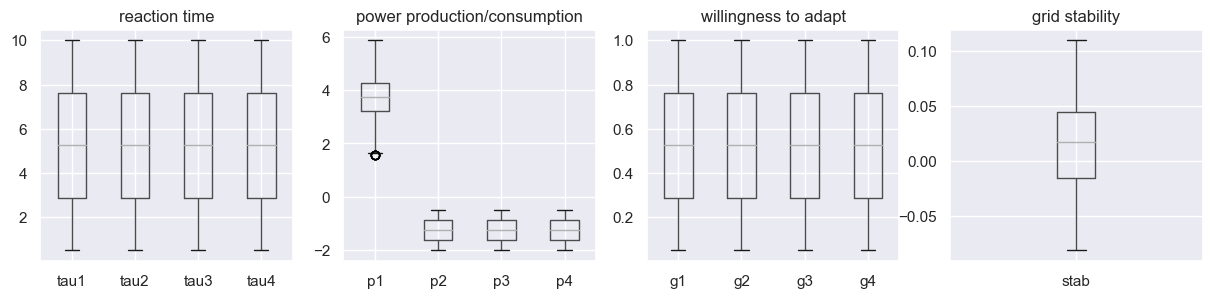

In [7]:
fig, axis = plt.subplots(1, 4, figsize=(15, 3))

for axs_ind, feature_group in enumerate(["tau", "p", "g"]):
        data.boxplot(
        column=[feature_group + str(i + 1) for i in range(4)], 
        ax= axis[axs_ind]
    )
data.boxplot(column="stab", ax= axis[3])

for axs_ind, title in enumerate(["reaction time", "power production/consumption",
                                 "willingness to adapt", "grid stability"]):
    axis[axs_ind].set(title=title);

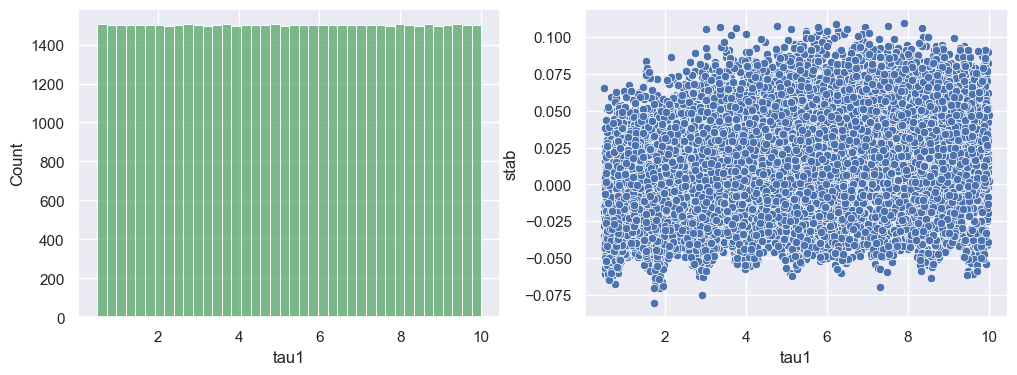

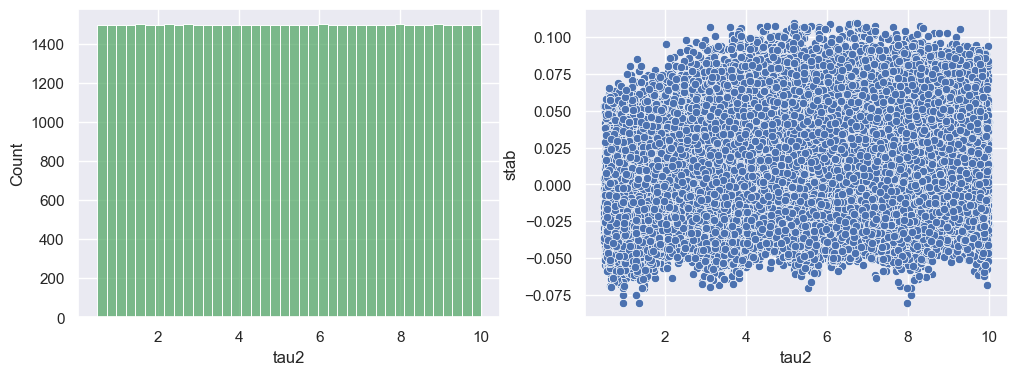

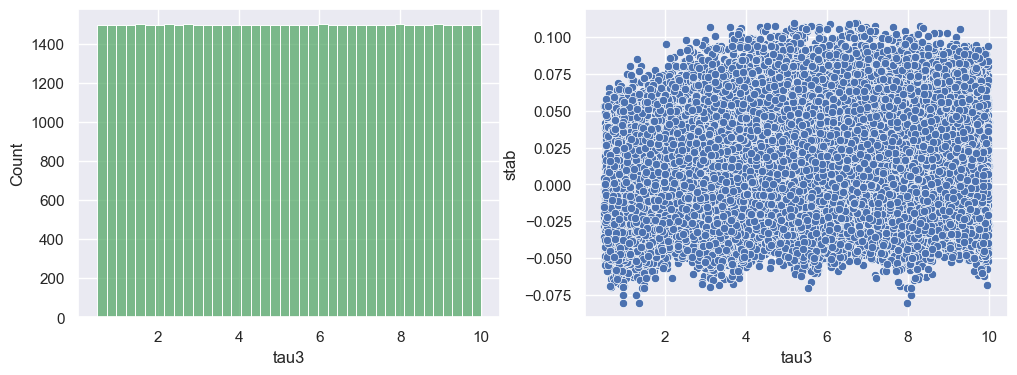

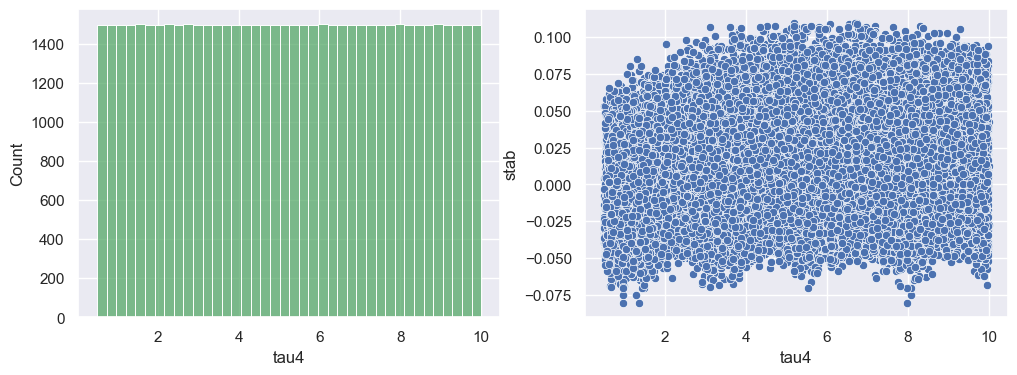

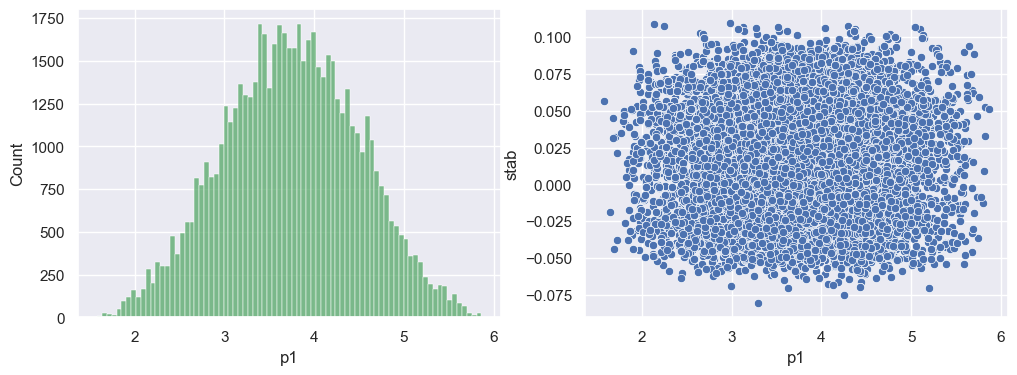

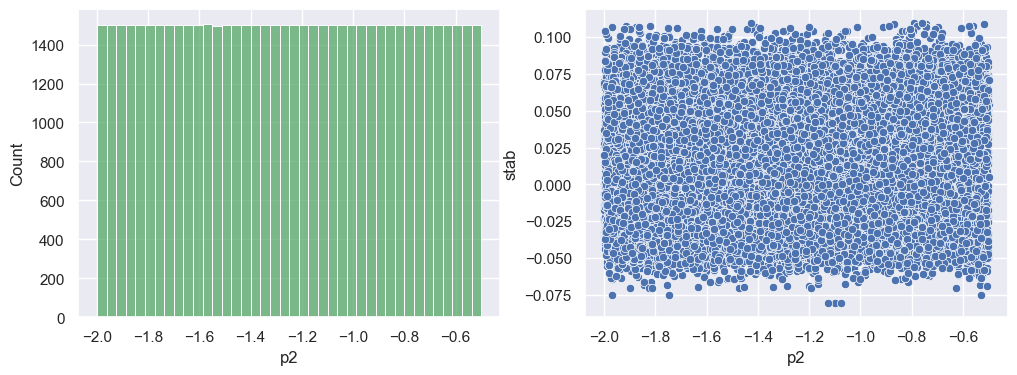

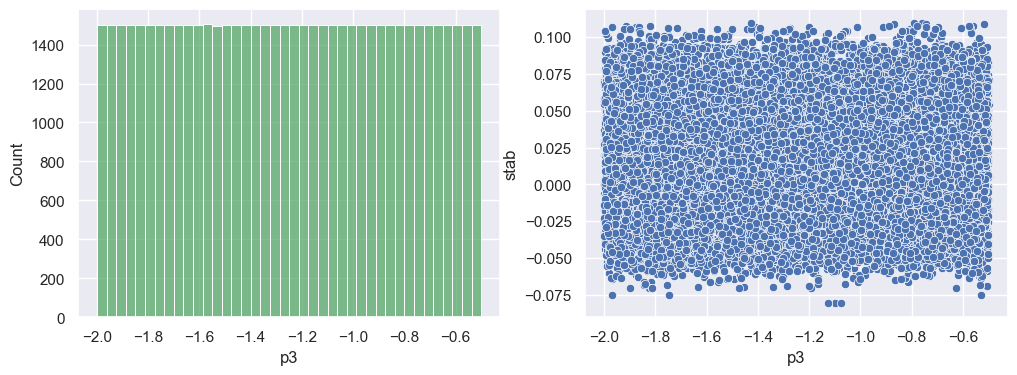

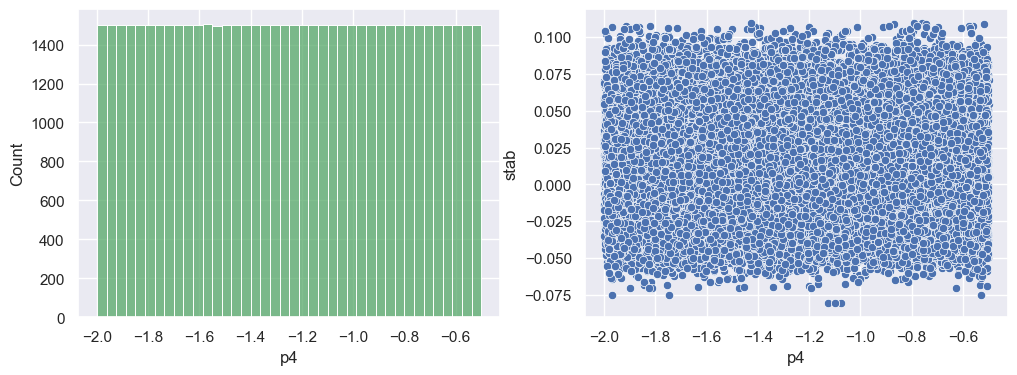

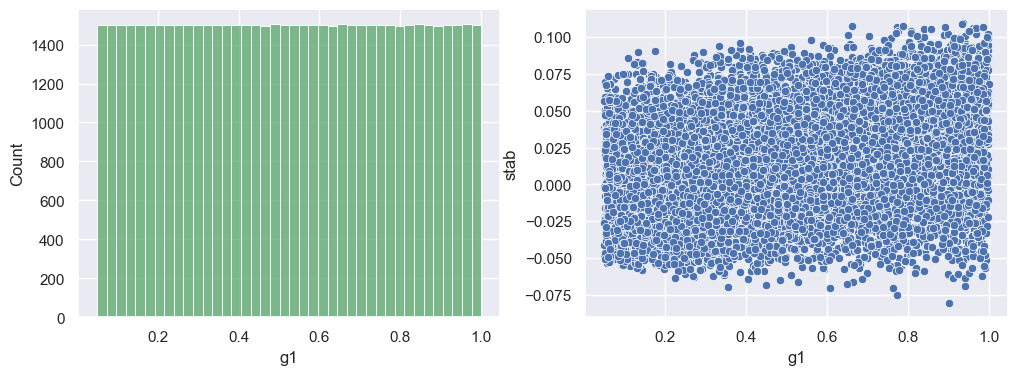

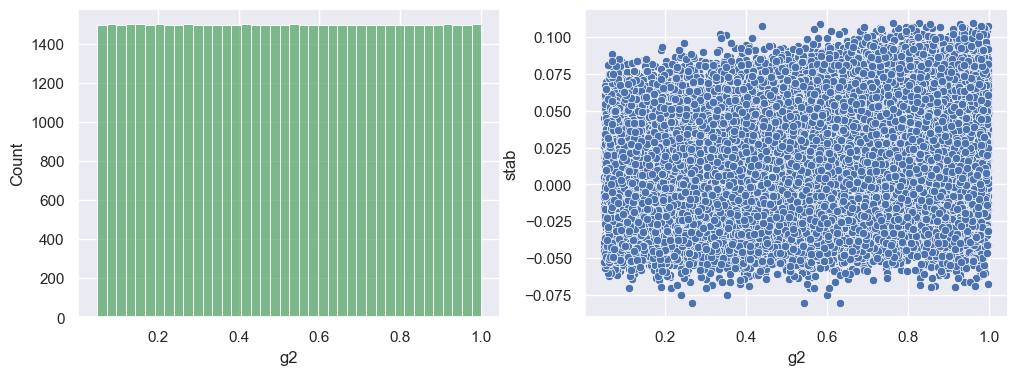

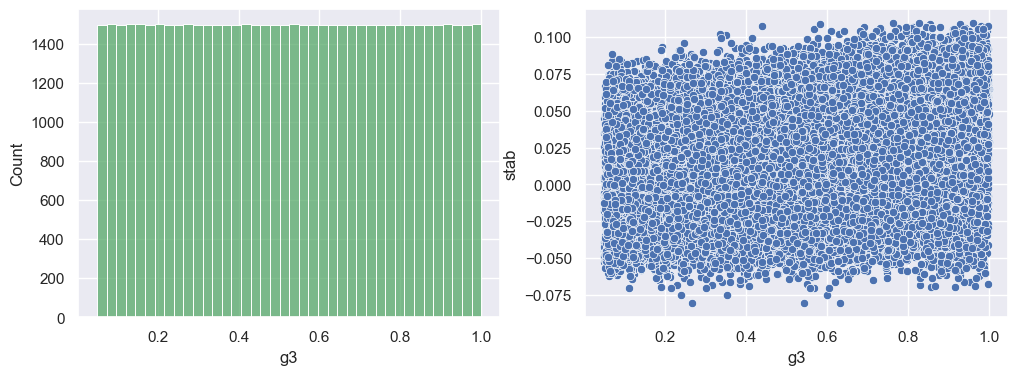

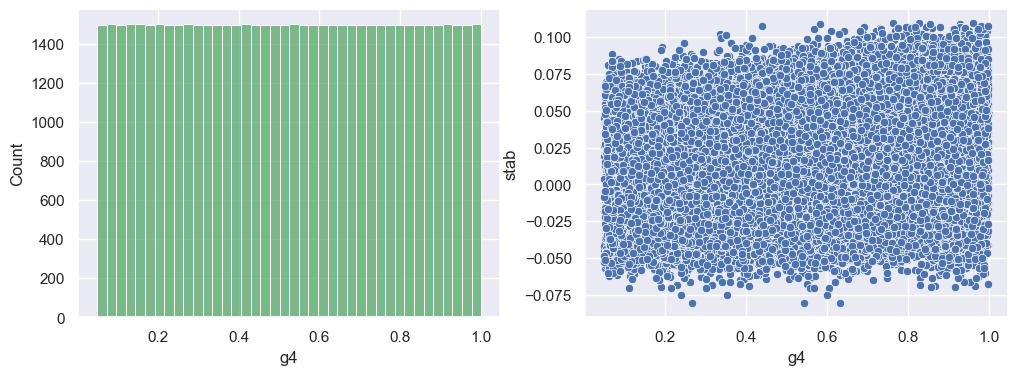

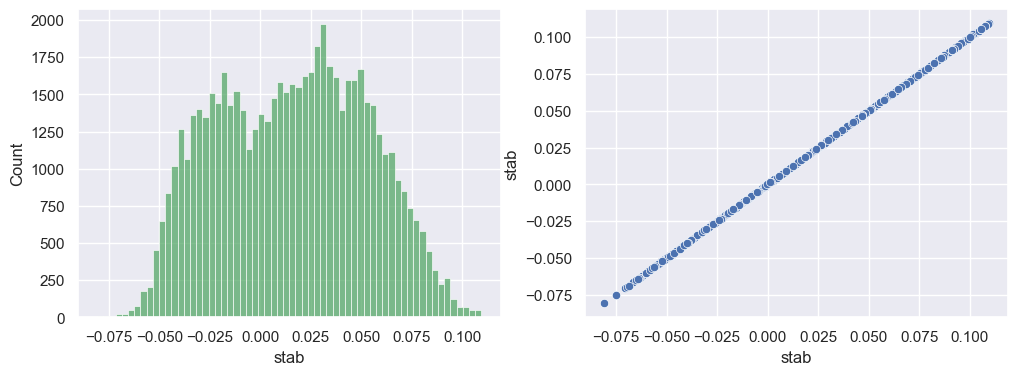

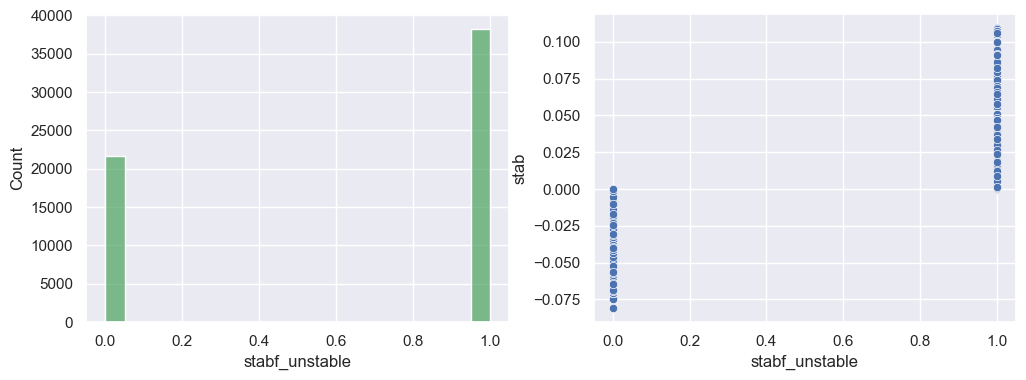

In [8]:
# Let's See the distribution of data wrt all input features and the output feature, stability.

for column in data:
    plot_fig, plot_axes = plt.subplots(1, 2, figsize = (12, 4))
    chart_1 = sns.histplot(x=data[column], ax = plot_axes[0], color='g')
    
    chart_2 = sns.scatterplot(x = column, y = 'stab', data = data, ax = plot_axes[1])

    plt.show()
del plot_fig, plot_axes    



In [7]:

print('P1: ',data.p1.skew(),   '            (P1) relationship with the  (ab), very small skew factor')


P1:  -0.012688423269881658             (P1) relationship with the  (ab), very small skew factor


- correlation between each numerical feature and the dependent variable

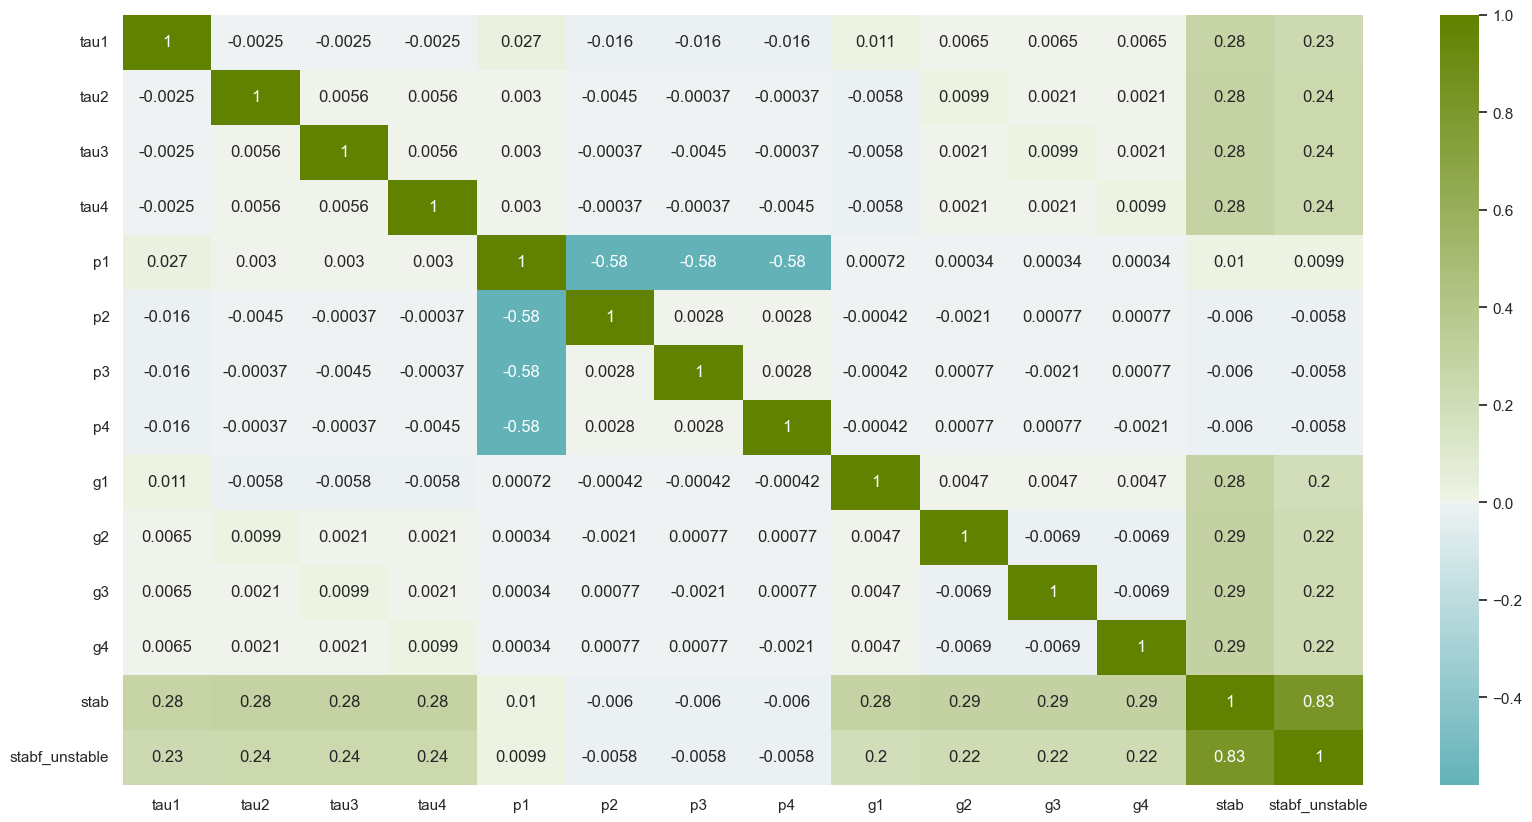

In [8]:
# Correlation matrix helps us to identify features that are more important then the others.
#correlation_map(data, 'stabf_unstable', 14)

correlation_map(data)

- Importing the dataset

In [9]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]

print('X:\n', X)
print('y:\n', y)

X:
            tau1      tau2      tau3      tau4        p1        p2        p3  \
49081  8.877656  2.117780  4.717824  8.995481  3.872523 -1.089452 -1.802525   
58824  7.587499  2.902592  4.800467  5.986490  3.333759 -0.771202 -1.383323   
8301   5.885405  9.989265  8.790848  2.001724  3.995171 -1.952787 -1.468542   
31016  1.324765  7.051038  4.581009  2.889611  3.714513 -1.974103 -0.735974   
3340   3.869109  9.803083  5.841910  3.600657  4.228790 -1.045827 -1.349984   
...         ...       ...       ...       ...       ...       ...       ...   
57476  0.940209  9.762001  7.989998  5.194362  4.536036 -1.395829 -1.467805   
59608  0.703584  6.738086  2.483231  8.529796  4.041827 -1.507968 -0.711674   
17064  3.397060  5.639554  3.277356  1.620274  2.088152 -0.646602 -0.555589   
54109  5.827787  2.088683  7.710060  2.352599  2.853124 -0.586991 -0.635906   
9647   8.868946  9.134768  2.631291  7.678328  4.693103 -1.038954 -1.947302   

             p4        g1        g2        g3  

- Segregating train and test sets
- training set will receive the first 59000 observations
-  testing set will accommodate the last 1,000.

In [10]:
X_training = X.iloc[:59000, :]
y_training = y.iloc[:59000]

X_testing = X.iloc[59000:, :]
y_testing = y.iloc[59000:, ]


- The ratio of both training and testing

In [11]:
ratio_training = y_training.value_counts(normalize=True)
ratio_testing = y_testing.value_counts(normalize=True)
ratio_training, ratio_testing
print('ratio_training\n',ratio_training) , print('ratio_testing\n',ratio_testing) 


ratio_training
 1    0.637695
0    0.362305
Name: stabf_unstable, dtype: float64
ratio_testing
 1    0.656
0    0.344
Name: stabf_unstable, dtype: float64


(None, None)

In [12]:
X_training = X_training.values
y_training = y_training.values

X_testing = X_testing.values
y_testing = y_testing.values
 

- Feature scaling
- must scalling all X for ANN

In [13]:
sc = StandardScaler()
X_training = sc.fit_transform(X_training)
X_testing = sc.transform(X_testing) 


<AxesSubplot: xlabel='sum_delay', ylabel='sum_adapt'>

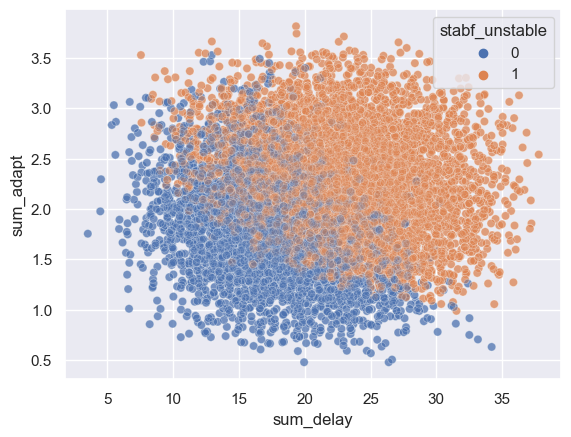

In [14]:
(data.assign( sum_delay = lambda x: x["tau1"] + x["tau2"] + x["tau3"] + x["tau4"],
             sum_adapt = lambda x: x["g1"] + x["g2"] + x["g3"] + x["g4"]).pipe((sns.scatterplot, "data"),
                                                               x="sum_delay", y="sum_adapt", hue="stabf_unstable", alpha=0.2))

# Part 2 - Building the ANN
   
   - this case will have structure of:
    - 1- one input layer ((12 input nodes))
    - 2-three hidden layers (24, 24 and 12 nodes, respectively);
    - 3-one single-node output layer.
    

- Artificial neural network (ANN)

In [15]:
# ANN initialization
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12)) 

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=24, activation='relu'))

# Adding the Third hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Adding the output layer (Single-node)
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the ANN
# optimizer = 'adam'----> is best optimizer
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
#Training the ANN on the Training set
ann.fit(X_training, y_training, epochs = 40)

Epoch 1/40
1844/1844 [==============================] - 8s 4ms/step - loss: 0.0564 - accuracy: 0.9767
Epoch 2/40
1844/1844 [==============================] - 8s 5ms/step - loss: 0.0557 - accuracy: 0.9764
Epoch 3/40
1844/1844 [==============================] - 6s 3ms/step - loss: 0.0544 - accuracy: 0.9773
Epoch 4/40
1844/1844 [==============================] - 7s 4ms/step - loss: 0.0535 - accuracy: 0.9781
Epoch 5/40
1844/1844 [==============================] - 7s 4ms/step - loss: 0.0544 - accuracy: 0.9776
Epoch 6/40
1844/1844 [==============================] - 8s 5ms/step - loss: 0.0540 - accuracy: 0.9773
Epoch 7/40
1844/1844 [==============================] - 6s 3ms/step - loss: 0.0535 - accuracy: 0.9781
Epoch 8/40
1844/1844 [==============================] - 6s 3ms/step - loss: 0.0527 - accuracy: 0.9778
Epoch 9/40
1844/1844 [==============================] - 7s 4ms/step - loss: 0.0526 - accuracy: 0.9781
Epoch 10/40
1844/1844 [==============================] - 6s 3ms/step - loss: 0.053

In [28]:
# Predicting the Test set results
y_pred = ann.predict(X_testing)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_testing.reshape(len(y_testing),1)),1))


32/32 [==============================] - 0s 3ms/step
[[0. 0.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [0. 0.]
 [1. 1.]]


In [29]:
accuracy(y_testing,y_pred)

                 Predicted Unstable  Predicted Stable
Actual Unstable                 337                 7
Actual Stable                    18               638

------------------------accuracy test-------------------------------
Accuracy : 97.5 % 


 - Confusion matrix

In [30]:
end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2023-01-31 01:50:09.065288
End time 2023-01-31 02:21:38.553281
Time elapsed 0:31:29.487993


# Part 3 - Making the predictions and evaluating the model

# classifiers

# 1- Decision Tree Classifier

In [20]:
# Training the Decision Tree Classifier model on the Training set
classifier=DecisionTreeClassifier()
classifier.fit(X_training,y_training)

# Predicting the Test set results
y_pred=classifier.predict(X_testing)


In [21]:
accuracy(y_testing,y_pred)

                 Predicted Unstable  Predicted Stable
Actual Unstable                 285                59
Actual Stable                    42               614

------------------------accuracy test-------------------------------
Accuracy : 89.9 % 


# 2- Random Forest Classifier

In [22]:
# Training the Random Forest Classifier model on the Training setclassifier= RandomForestClassifier(n_estimators=5)
classifier.fit(X_training,y_training)

# Predicting the Test set results
y_pred=classifier.predict(X_testing)


  

In [23]:
accuracy(y_testing,y_pred)

                 Predicted Unstable  Predicted Stable
Actual Unstable                 289                55
Actual Stable                    49               607

------------------------accuracy test-------------------------------
Accuracy : 89.60000000000001 % 


# 3- Logistic Regression

In [26]:
 # Training the Logistic Regression model on the Training set

classifier = LogisticRegression(random_state = 42)
classifier.fit(X_training, y_training)

# Predicting the Test set results
y_pred= classifier.predict(X_testing)



In [27]:
accuracy(y_testing,y_pred)

                 Predicted Unstable  Predicted Stable
Actual Unstable                 261                96
Actual Stable                    91               552

------------------------accuracy test-------------------------------
Accuracy : 81.3 % 


# 4- naive-bayes

In [28]:
#training the naive bayes model on the training set
classifier=GaussianNB()
classifier.fit(X_training,y_training)


# Predicting the Test set results
y_pred = classifier.predict(X_testing)



In [29]:
accuracy(y_testing,y_pred)

                 Predicted Unstable  Predicted Stable
Actual Unstable                 250               107
Actual Stable                    58               585

------------------------accuracy test-------------------------------
Accuracy : 83.5 % 


# 5- K Neighbors Classifier (K-NN)

In [30]:
#Training the K-NN model on the Training set
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_training, y_training)

#Predicting the Test set results
y_pred = classifier.predict(X_testing)

cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
print(cm)

In [31]:
accuracy(y_testing,y_pred)

                 Predicted Unstable  Predicted Stable
Actual Unstable                 302                55
Actual Stable                    45               598

------------------------accuracy test-------------------------------
Accuracy : 90.0 % 


# 6- SVM 

- SVC RBF

In [32]:
# Training the SVC RBF model on the Training set
classifier = SVC()
classifier.fit(X_training, y_training)

# Predicting the Test set results
y_pred = classifier.predict(X_testing)


In [33]:
accuracy(y_testing,y_pred)

                 Predicted Unstable  Predicted Stable
Actual Unstable                 347                10
Actual Stable                     4               639

------------------------accuracy test-------------------------------
Accuracy : 98.6 % 


- SVC POLY

In [34]:
# Training the SVC POLY model on the Training set
classifier = SVC(kernel='poly')
classifier.fit(X_training, y_training)

# Predicting the Test set results
y_pred = classifier.predict(X_testing)

In [35]:
accuracy(y_testing,y_pred)

                 Predicted Unstable  Predicted Stable
Actual Unstable                 281                76
Actual Stable                    12               631

------------------------accuracy test-------------------------------
Accuracy : 91.2 % 


In [36]:
end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2023-01-23 14:18:20.115564
End time 2023-01-23 14:30:03.790387
Time elapsed 0:11:43.674823
